,bucket,cpu,gcl,population,gcl delta,cpu abnormal,cpu avg
count,1228.000000,1228.000000,1.228000e+03,1228.000000,1227.000000,66.000000,1129.000000
mean,9795.081433,17.932714,8.055897e+06,11.840391,11.165444,188.855650,17.398169
std,227.194960,43.041462,4.246671e+03,0.368610,6.996353,53.491058,1.144390
min,9389.000000,3.101687,8.049570e+06,10.000000,0.000000,52.673840,13.233831
25%,9615.000000,4.865619,8.051680e+06,12.000000,8.000000,201.554890,16.628538
50%,9796.000000,5.751028,8.055913e+06,12.000000,8.000000,206.864891,17.206949
75%,10000.000000,9.678365,8.059772e+06,12.000000,16.000000,220.125816,18.107528
max,11000.000000,242.755938,8.063270e+06,12.000000,26.000000,242.755938,21.123420


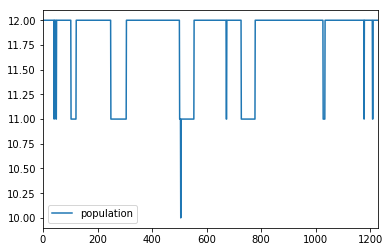

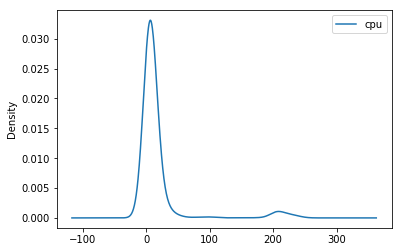

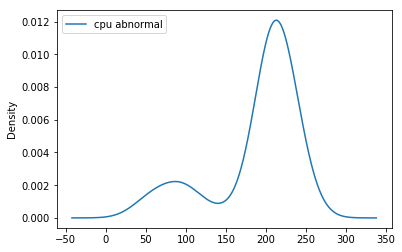

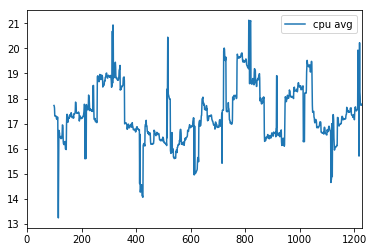

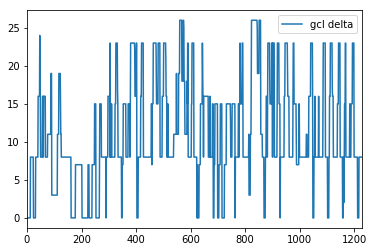

In [2]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

REFRESH_DATA = 0

if REFRESH_DATA:
    reports = fs.main()
    reports = [
        {
            **x,
            'gcl': x['gcl']['progress']
        }
        for x in reports
    ]
    df = pd.DataFrame(reports)
    df.to_csv("reports.csv")
else:
    df = pd.read_csv("reports.csv")
    
df['gcl delta'] = df['gcl'].diff().shift(-1)
df['cpu abnormal'] = df[df['cpu'] > 50]["cpu"]
df['cpu avg'] = df['cpu'].rolling(100).sum() / 100

df.plot(y="population")
df.plot.density(y="cpu")
df.plot.density(y="cpu abnormal")
df.plot(y="cpu avg")
df.plot(y="gcl delta")
df.describe()